# --  Cardiovascular Data

#### STEPS:
1) Data quality check such as the features are balanced or not?  
2) Merge Data  
3) Box plot and Remove Outliers  
4) Correlation Matrix  
5) Scatter plot of a feature to visualize gaps  
6) Group data and barplots  
7) Pivot table  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cardio_base = pd.read_csv("cardio_base.csv")
cardio_base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [3]:
cardio_alco = pd.read_csv("cardio_alco.csv")
cardio_alco.head()

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0


In [4]:
# Split and drop
cardio_alco[['id', 'alco']] = cardio_alco['id;alco'].str.split(';', expand=True)
cardio_alco.drop('id;alco', axis=1, inplace=True)     # Axis=1 means column, whereas axis=0 means row which is default.
# Converting the columns to int otherwise they will be object
cardio_alco['id'] = cardio_alco['id'].astype(int)
cardio_alco['alco'] = cardio_alco['alco'].astype(int)
cardio_alco.head()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [5]:
# CHECK
cardio_base.info()
cardio_alco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      56903 non-null  int32
 1   alco    56903 non-null  int32
dtypes: int32(2)
memory usage: 444.7 KB


In [6]:
# The dataset doesn't contain null values
# alco dataset has less entries than base

#### DESCRIBE

In [7]:
# CHECK
cardio_base.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [8]:
# Rough Check
(cardio_base['weight'] % 1 != 0).any() # True
#cardio_base['weight'][450:500]
decimal_values = cardio_base['weight'][cardio_base['weight'] % 1 != 0].values
print(decimal_values[:5]) # len=193

[ 65.5  64.8  83.6 106.5  62.3]


#### Value Counts

In [9]:
# OBSERVATIONS
# The male entries are around double than the female entries.
cardio_base['gender'].value_counts()
# There are 3 categories in cholesterol. The first one has much higher entries (~5X+) than the others.
cardio_base['cholesterol'].value_counts()
# There are 2 categories in smoke. The non-smokers attribute have much higher entries (~10X) than the smokers.
cardio_base['smoke'].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

In [10]:
# Conclusion: The categories of all three features are imbalanced.

In [11]:
# CHECK
# There are 2 categories in alco. The non-drinkers attribute have much higher entries (~18X) than the alchohol drinkers.
cardio_alco['alco'].value_counts()

0    53862
1     3041
Name: alco, dtype: int64

In [12]:
# CHECK
cardio_alco.describe()

,id,alco
count,56903.000000,56903.000000
mean,48472.162065,0.053442
std,30994.121701,0.224915
min,44.000000,0.000000
25%,20401.000000,0.000000
50%,40763.000000,0.000000
75%,77109.500000,0.000000
max,99954.000000,1.000000


In [13]:
# A lot of id's doesn't exists for the alchohol data.
# I think we would need to drop 70k-57k=13k entries

In [14]:
# MERGE

# This is the data of 57,000 patients
cardio_full = pd.merge(cardio_base, cardio_alco, on='id', how='inner')  # 'inner' is the default how.
cardio_full.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,44,14605,1,159,60.0,110,70,1,0,0
1,45,20652,1,160,73.0,130,85,1,0,0
2,46,21940,2,173,82.0,140,90,3,0,0
3,47,20404,1,163,55.0,120,80,1,0,0
4,49,18328,2,175,95.0,120,80,1,0,0


In [15]:
cardio_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56903 entries, 0 to 56902
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           56903 non-null  int64  
 1   age          56903 non-null  int64  
 2   gender       56903 non-null  int64  
 3   height       56903 non-null  int64  
 4   weight       56903 non-null  float64
 5   ap_hi        56903 non-null  int64  
 6   ap_lo        56903 non-null  int64  
 7   cholesterol  56903 non-null  int64  
 8   smoke        56903 non-null  int64  
 9   alco         56903 non-null  int32  
dtypes: float64(1), int32(1), int64(8)
memory usage: 4.6 MB


In [16]:
# Merge is a way to join('inner', 'outer', 'left', 'right') two tables. 
    #The input arguments include 'on' and 'how'

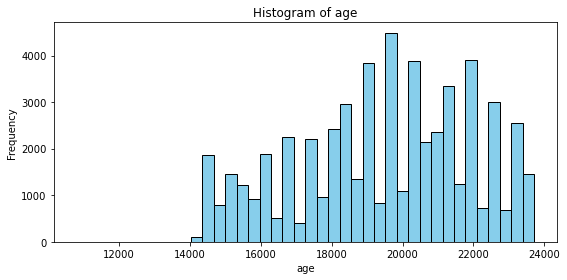

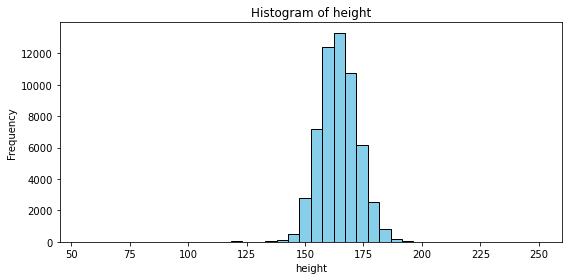

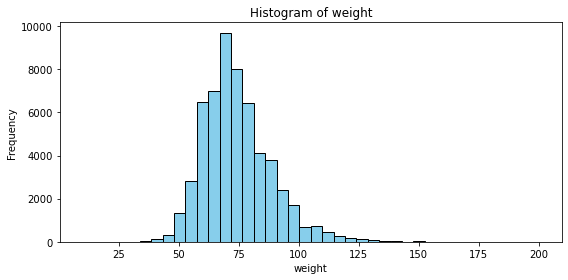

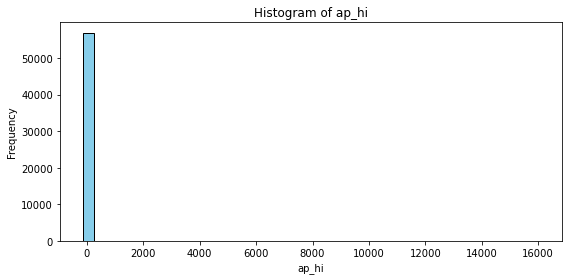

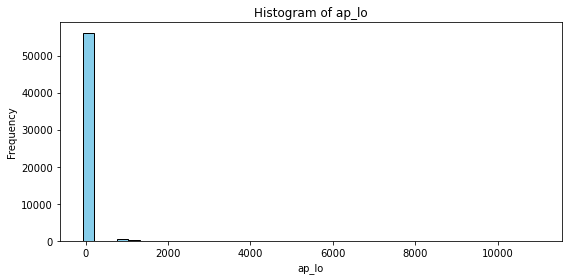

In [17]:
columns_to_plot = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Plot histograms and density plots for selected columns
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))

    # Histogram
    plt.hist(cardio_full[column], bins=40, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    #plt.show()
    #display(plt.gcf()) # To view one plot at a time
'''
    # Density plot (Kernel Density Estimate - KDE)
    plt.subplot(1, 2, 2)
    cardio_full[column].plot(kind='density', color='orange')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
'''
pass

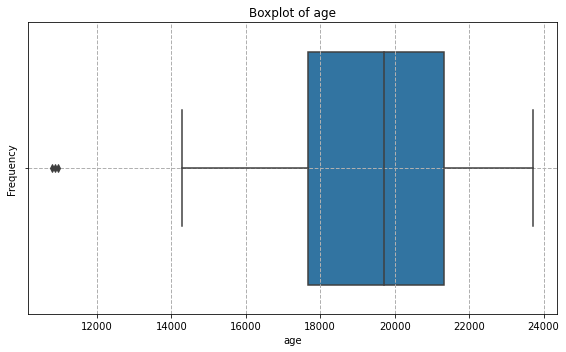

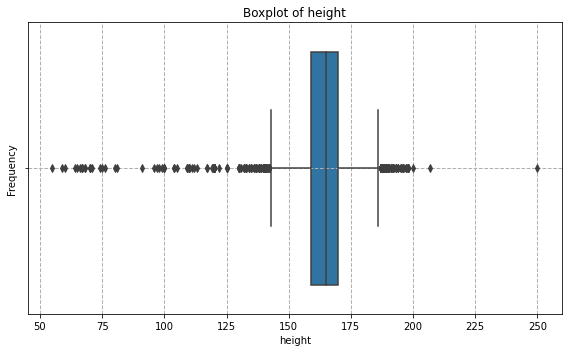

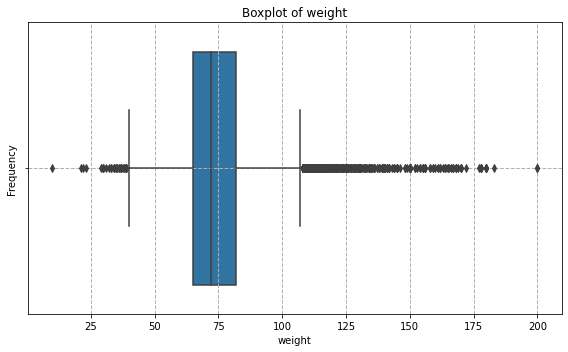

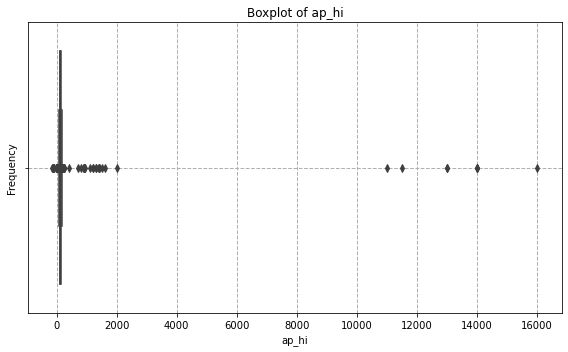

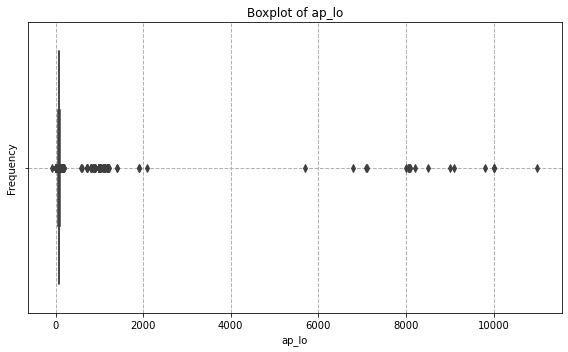

In [18]:
import seaborn as sns

# See plots for ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
#sns.boxplot(cardio_full['age'])
#sns.boxplot(cardio_full['height'])

for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    
    # Example: Histogram
    sns.boxplot(cardio_full[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    
    plt.grid(True, which='both', linestyle='--', linewidth=1)
    plt.xticks()

In [19]:
# From the box plots, it seems like there are a lot of ap_hi and ap_lo

#### Detecting outlier using Z score

In [20]:
# For Height
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

outlier_pt=detect_outliers(cardio_full['height'])

In [21]:
# CHECK
#min(outlier_pt), max(outlier_pt) # NOTE: No need for min and max
len(outlier_pt)

# sorted(outlier_pt)
# From this check we learned that out outliers exist between:

###############: 139 and 190

210

#### Detecting outlier using IQR

In [22]:
# For Height
data = sorted(cardio_full['height'])

quantile1, quantile3= np.percentile(data,[25,75])
iqr=quantile3-quantile1

lower_bound_val = quantile1 -(1.5 * iqr) 
upper_bound_val = quantile3 +(1.5 * iqr)

print(lower_bound_val,upper_bound_val)

142.5 186.5


In [23]:
mask_below_min = cardio_full['height'] < lower_bound_val
mask_above_max = cardio_full['height'] > upper_bound_val
outlier_pt2 = cardio_full['height'][mask_below_min | mask_above_max]
len(outlier_pt2)

409

OBSERVATION:  
IQR squeezes the data more.  
Little difference between Z-score and IQR, but Z-score has gathered a double count of outliers.

#### Plan for removing outliers:
 
 1) Age, ap_hi, and ap_lo outliers will be removed according to the IQR detection  
 2) Height and weight will be removed according to my observation of box plots

In [24]:
# For Age, ap_hi, and ap_lo:
abc1 = ['age', 'ap_hi', 'ap_lo']
cardio_red = pd.DataFrame()


for f in abc1:
    data = sorted(cardio_full[f])

    quantile1, quantile3= np.percentile(data,[25,75])
    iqr=quantile3-quantile1

    lower_bound_val = quantile1 -(1.5 * iqr) 
    upper_bound_val = quantile3 +(1.5 * iqr)

    print(lower_bound_val,upper_bound_val)

    
    mask_below_min = cardio_full[f] < lower_bound_val
    mask_above_max = cardio_full[f] > upper_bound_val
    outlier_pt2 = cardio_full[f][mask_below_min | mask_above_max]    # OR condition
    print(len(outlier_pt2))

    mask_below_min = cardio_full[f] >= lower_bound_val
    mask_above_max = cardio_full[f] <= upper_bound_val
    series1 = cardio_full[f][mask_below_min & mask_above_max]   # AND condition
    print(len(series1))
    
    cardio_red[series1.name] = series1

12192.0 26804.0
3
56900
90.0 170.0
1174
55729
65.0 105.0
3794
53109


In [25]:
# CHECK
#age_filtered[6160:6165]    # checking index
    # Orig index is returned
#outlier_pt2.head()

In [26]:
#len(series1) #=53109 
#series1[series1.isnull()].index # No null values
#series1

In [27]:
# Got age_filtered,
#cardio_red[6160:6165]
#cardio_red.info()

In [28]:
# I think columns containing null values have Float datatype.
# Errors:
#cardio_red['ap_hi'] = cardio_red['ap_hi'].astype(int)
#cardio_red['ap_lo'] = cardio_red['ap_lo'].astype(int)

In [29]:
# For Height and Weight:
# Height: >225
# Weight: <25 and >175

mask_below_min = cardio_full['weight'] < 25
mask_above_max = cardio_full['weight'] > 175
outlier_pt2 = cardio_full['weight'][mask_below_min | mask_above_max]
print(len(outlier_pt2))
#outlier_pt2
#cardio_full.loc[outlier_pt2.index] # using .loc[]

15


NOTE: Considering "Height" column as outlier-free  

In [30]:
mask_below_min = cardio_full['weight'] > 25
mask_above_max = cardio_full['weight'] < 175
filtered_weight = cardio_full['weight'][mask_below_min & mask_above_max]

cardio_red[filtered_weight.name] = filtered_weight
print(len(filtered_weight))

56888


In [31]:
cardio_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56900 entries, 0 to 56902
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     56900 non-null  int64  
 1   ap_hi   55726 non-null  float64
 2   ap_lo   53107 non-null  float64
 3   weight  56885 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.2 MB


##### Outliers count:
3 (0.005%) in age,  
15 (0.03%) in weight,  
1174 (2%) in ap_hi,  
3794 (~7%) in ap_lo

In [32]:
# DROP NAN
cardio_red = cardio_red.dropna()

In [33]:
cardio_red.info()  # For Confirmation: It has 52405 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52405 entries, 0 to 56902
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     52405 non-null  int64  
 1   ap_hi   52405 non-null  float64
 2   ap_lo   52405 non-null  float64
 3   weight  52405 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.0 MB


In [34]:
# Observe that 4495 rows have been removed from cardio_red
cardio_full

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,44,14605,1,159,60.0,110,70,1,0,0
1,45,20652,1,160,73.0,130,85,1,0,0
2,46,21940,2,173,82.0,140,90,3,0,0
3,47,20404,1,163,55.0,120,80,1,0,0
4,49,18328,2,175,95.0,120,80,1,0,0
...,...,...,...,...,...,...,...,...,...,...
56898,99949,21151,1,178,69.0,130,90,1,0,0
56899,99950,19538,2,155,76.0,130,90,1,0,0
56900,99951,22491,2,170,72.0,120,80,1,0,0
56901,99952,15450,2,165,66.0,120,80,1,0,0


In [35]:
cardio_full_cleaned = cardio_full.loc[cardio_red.index]
cardio_full_cleaned = cardio_full_cleaned.reset_index(drop=True)
    # loc command is used to find 
cardio_full_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52405 entries, 0 to 52404
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           52405 non-null  int64  
 1   age          52405 non-null  int64  
 2   gender       52405 non-null  int64  
 3   height       52405 non-null  int64  
 4   weight       52405 non-null  float64
 5   ap_hi        52405 non-null  int64  
 6   ap_lo        52405 non-null  int64  
 7   cholesterol  52405 non-null  int64  
 8   smoke        52405 non-null  int64  
 9   alco         52405 non-null  int32  
dtypes: float64(1), int32(1), int64(8)
memory usage: 3.8 MB


Learning:

".loc" (Label-based indexing)  
         DataFrame.loc[row_label, column_label]
     
".iloc" (Integer-location based indexing)  
         DataFrame.iloc[row_position, column_position]

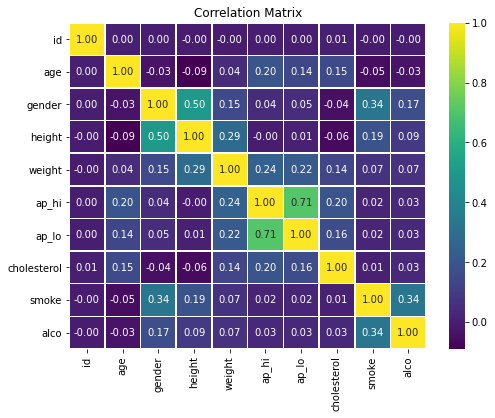

In [36]:

# Calculate the correlation matrix
correlation_matrix = cardio_full_cleaned.corr()

# Plot the correlation matrix as a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


###### Observations:  

1- Strong correlation between ap_hi and ap_lo of 0.71  
2- Strong correlation of 0.5 between height and gender  
3- 0.34 between smoke and gender  
4- 0.29 between height and weight

#### Scatter plot to visualize gaps

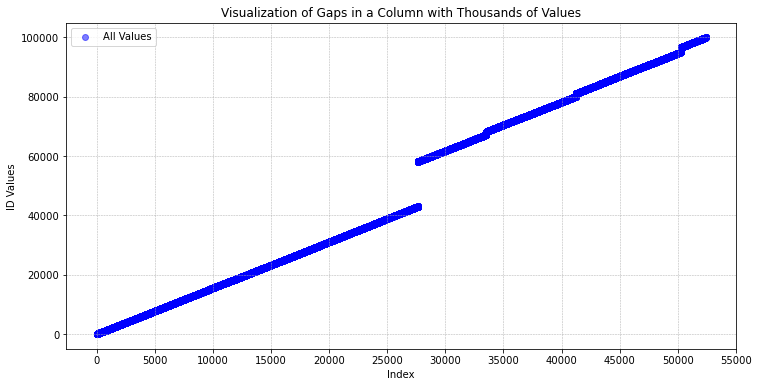

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(cardio_full_cleaned.index, cardio_full_cleaned['id'], color='blue', label='All Values', alpha=0.5)
    
plt.xlabel('Index')
plt.ylabel('ID Values')
plt.title('Visualization of Gaps in a Column with Thousands of Values')
plt.legend()
plt.xticks(np.linspace(0, 55000, 12)) 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

Me: Width of the plot is fine.

In [38]:
#cardio_full_cleaned.loc[27620:27635] # See the biggest gap in the middle
    # Huge difference (around 15k) in ID!

In [39]:
cardio_full_cleaned.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
count,52405.000000,52405.000000,52405.000000,52405.000000,52405.000000,52405.000000,52405.000000,52405.000000,52405.000000,52405.000000
mean,48466.008186,19494.213854,1.353211,164.454899,74.182268,126.592138,81.781548,1.364622,0.088140,0.052533
std,31002.257813,2456.814111,0.477972,8.133138,14.045288,14.410172,7.714885,0.680550,0.283502,0.223102
min,44.000000,14277.000000,1.000000,55.000000,29.000000,90.000000,65.000000,1.000000,0.000000,0.000000
25%,20325.000000,17740.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,0.000000
50%,40798.000000,19715.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,0.000000
75%,77071.000000,21342.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000
max,99954.000000,23713.000000,2.000000,250.000000,172.000000,170.000000,105.000000,3.000000,1.000000,1.000000


Average Age for Each Group:
 gender  cholesterol
1       1              19353.198041
        2              19688.345528
        3              20579.026834
2       1              19240.916388
        2              19476.576389
        3              20425.847357
Name: age, dtype: float64

Number of Records in Each Group:
 gender  cholesterol
1       1              25010
        2               4674
        3               4211
2       1              14352
        2               2304
        3               1854
dtype: int64


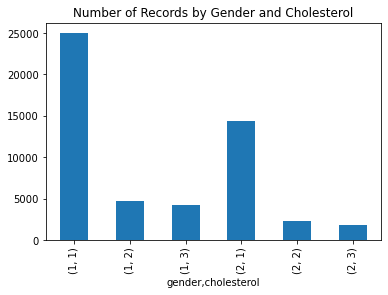

In [40]:

# Group the data by 'gender' and 'cholesterol'
grouped_data = cardio_full_cleaned.groupby(['gender','cholesterol']) # This is a kind of hierarchy

# Example 1: Calculate average age for each group
average_age = grouped_data['age'].mean()
print("Average Age for Each Group:\n", average_age)

# Example 2: Count the number of records in each group
group_counts = grouped_data.size()
print("\nNumber of Records in Each Group:\n", group_counts)

# Example 3: Visualize the relationships (e.g., bar plot)
group_counts.plot(kind='bar', title='Number of Records by Gender and Cholesterol')
plt.show()


In [41]:
# Observation:
# We already know that records count of type1 cholesterol is high

#type(average_age)

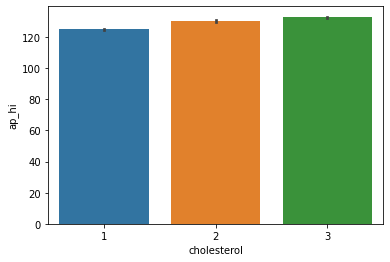

In [42]:
# Ya I think this barplot takes the mean of the y values. Anyways, this is a powerful command.
sns.barplot(x = cardio_full_cleaned['cholesterol'], y = cardio_full_cleaned['ap_hi'], data = cardio_full_cleaned)

In [43]:
df_chol = cardio_full_cleaned.groupby('cholesterol').mean()
df_chol

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco
cholesterol,,,,,,,,,
1,48356.401860,19312.258396,1.364616,164.710558,73.097017,124.968726,81.087699,0.085463,0.047508
2,48558.511465,19618.423474,1.330181,163.936945,76.605297,130.407710,83.371740,0.106048,0.074377
3,49070.927617,20532.201649,1.305688,163.391591,78.437791,132.738170,84.455070,0.084913,0.060016


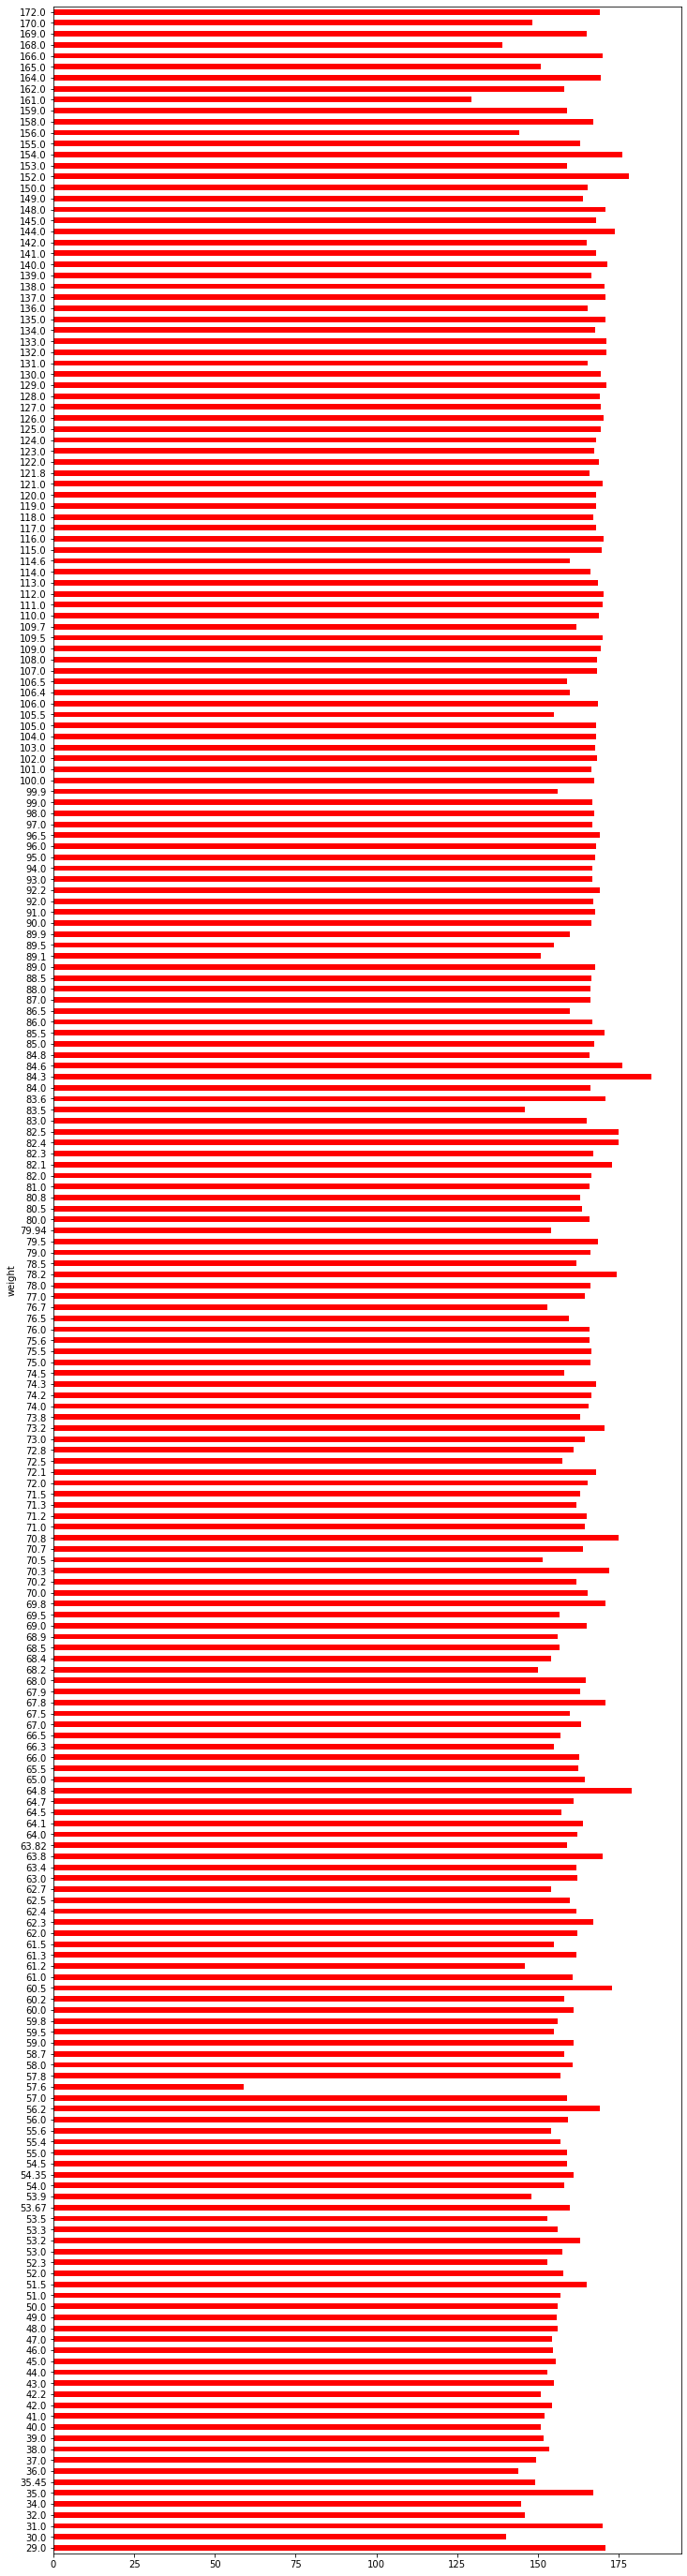

In [44]:
# Plot height from the grouped data based on weight
plt.figure(figsize=(12, 50))

df_w = cardio_full_cleaned.groupby('weight').mean()
df_w['height'].plot(kind = 'barh', color = 'r', width = 0.5)

In [45]:
# Sort height in the grouped data based on weight
df_w_h = df_w.sort_values(by = ['height'], ascending = True)
#df_w_h['height']

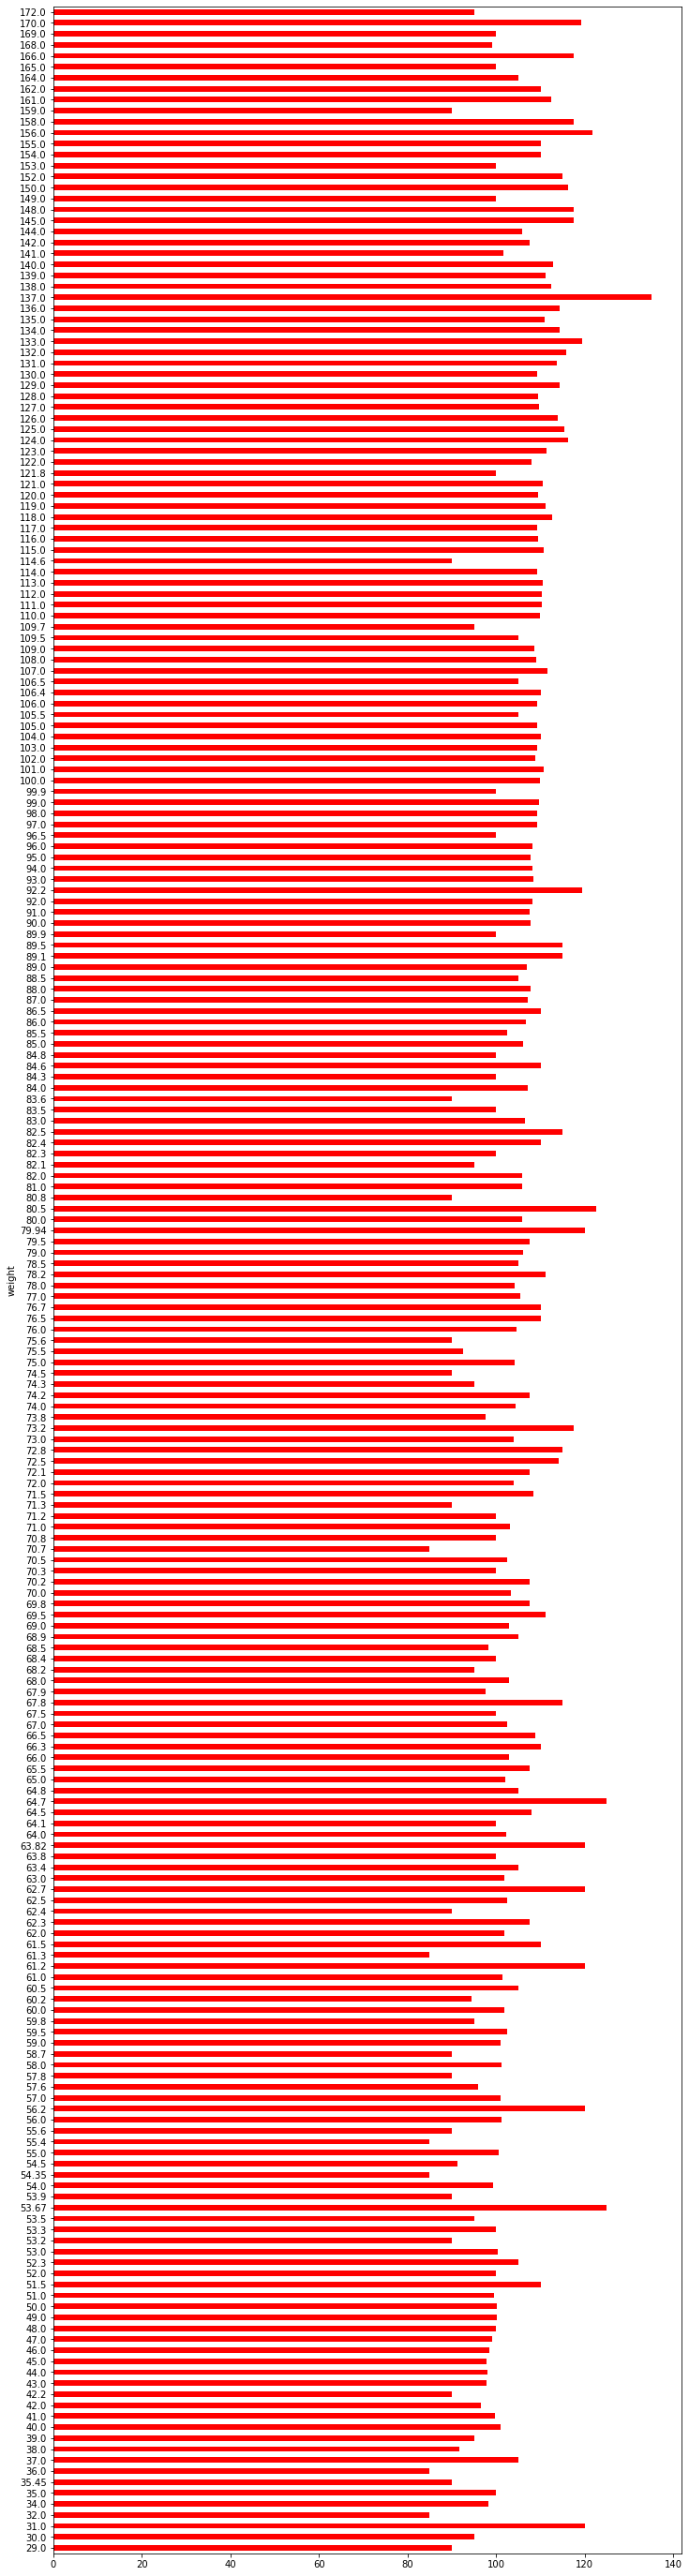

In [46]:
# Plot average of ap_lo and ap_hi from the grouped data based on weight
plt.figure(figsize=(12, 50))
df_w[['ap_lo', 'ap_hi']].mean(axis=1).plot(kind = 'barh', color = 'r', width = 0.5)

#### Pivot Table

Arguments:  

1- Dataframe  
2- Values  
3- Columns  
4- Index  
5- Aggregation function

NOTES:  
- Columns must always be categorical
- Multiple indexes will form a hierarchy
- Multiple values will form a hierarchy with columns. (In this case values will be on a higher-level)
- Common aggregation function = np.mean

In [47]:
# Q- Is giving a column necessary in pivot tables?

In [49]:
pd.pivot_table(cardio_full_cleaned, values = ['age'], columns = ['smoke'], index = ['gender','cholesterol'],
                    aggfunc=np.mean)

# Remove columns
pd.pivot_table(cardio_full_cleaned, values = ['age'], index = ['gender','cholesterol'], aggfunc=np.mean)

age
gender cholesterol              
1      1            19353.198041
       2            19688.345528
       3            20579.026834
2      1            19240.916388
       2            19476.576389
       3            20425.847357